In [ ]:
'''
data: 1000 AND logic
    input: 1 value = sum of 2 input value (from 0 to 1) => i know it trash, thats what i want
    output: 1 prediction of logic

no framework
model: 1 logistic regression neuron
    layers: 1 neuron
    params: learning rate 0.0005
    hyperparams: X
    algorithm: BinaryCrossEntropy loss

result: that what i'm looking for
    test: X

'''

In [1]:
import numpy as np

data = np.loadtxt("and.csv", delimiter=",", skiprows=1)
feature = data[:,0] + data[:,1]
label = data[:,2]

In [2]:
def init_params():
    w = np.random.rand(1, 1)
    b = np.zeros((1, 1))
    return w, b

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward(feature, w, b):
    z = w * feature + b
    prediction = sigmoid(z)
    return prediction

def backward(feature, label, prediction):
    dj = prediction - label
    dw = 1/len(label) * dj @ feature.T
    db = 1/len(label) * np.sum(dj, axis = 1, keepdims = True)
    return dw, db

def update_params(alpha, w, b, dw, db):
    w = w - alpha * dw
    b = b - alpha * db
    return w, b

In [3]:
def mse(label, prediction):
    return np.sum(np.square(prediction - label)) / len(label)

def train(iterations, alpha):
    w, b = init_params()
    losses = []
    for iteration in range(iterations):
        prediction = forward(feature, w, b)
        dw, db = backward(feature, label, prediction)
        w, b = update_params(alpha, w, b , dw, db)
        loss = mse(label, prediction)
        losses.append(loss)
    return losses, w, b

losses, w, b = train(100, 0.0001)

[[0.64012994]] [[-0.00397495]]


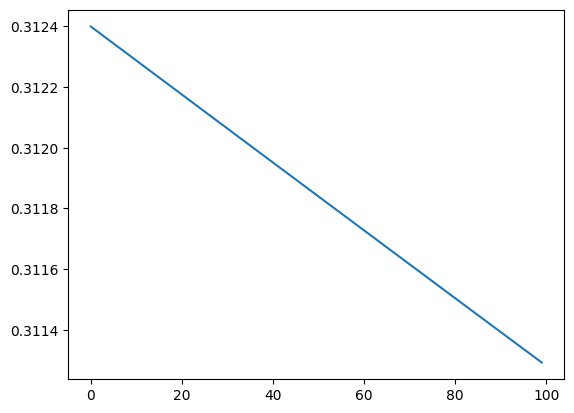

In [4]:
import matplotlib.pyplot as plt

print (w, b)
plt.plot(range(len(losses)), losses)

Text(0.5, 1.0, 'Do da threshold stuff and this must be fine')

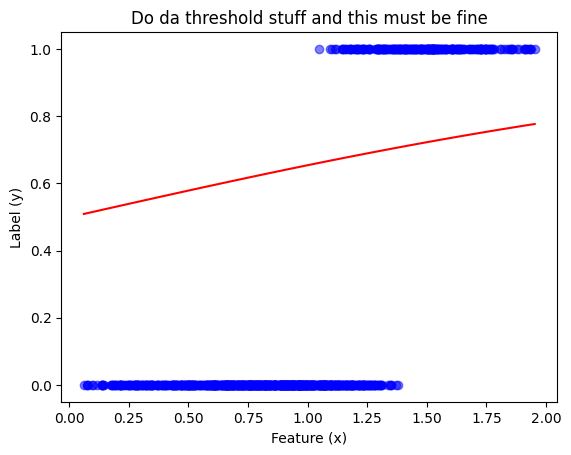

In [5]:
scalar_w = w.item()
scalar_b = b.item()

plt.scatter(feature, label, color='blue', alpha=0.5, label="Data Points")
x_vals = np.linspace(np.min(feature), np.max(feature), 100)
y_vals = sigmoid(scalar_w * x_vals + scalar_b)
plt.plot(x_vals, y_vals, color='red', label="Linear Function (w*x + b)")

plt.xlabel("Feature (x)")
plt.ylabel("Label (y)")
plt.title("Do da threshold stuff and this must be fine")